In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


# Loading and Analyzing the Dataset
We load the dataset athlete_events.csv, which contains information about Olympic athletes, physical attributes, and achievements. We explore the dataset's basic statistics and structure with the describe() function to understand the dataset. As we see below, there are no missing values in the dataset.

In [2]:
data_file_path = '/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv'
data = pd.read_csv(data_file_path)
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


To simulate real-world scenarios with incomplete data, we add random missing values to the dataset using a custom function. The following function introduces random NaN values into the dataset based on a specified missing rate. We apply the function to add a 10% missing rate to the dataset and inspect the changes.

In [3]:
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

data_file_path = '/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv'
data = pd.read_csv(data_file_path)

# Add random missing values with a 10% rate
data_with_missing = add_random_missing_values(data, missing_rate=0.1)

print(data_with_missing.head())

print(f"Dataset size: {data.shape}")

print(data.info())

print(data.describe(include='all'))

    ID                      Name Sex   Age  Height  Weight            Team  \
0  1.0                 A Dijiang   M  24.0   180.0    80.0           China   
1  2.0                  A Lamusi   M  23.0   170.0     NaN           China   
2  3.0                       NaN   M  24.0     NaN     NaN         Denmark   
3  4.0      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4  5.0  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games    Year  Season       City          Sport  \
0  CHN  1992 Summer  1992.0  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012.0  Summer     London           Judo   
2  DEN  1920 Summer  1920.0  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900.0  Summer        NaN     Tug-Of-War   
4  NED  1988 Winter  1988.0  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2       

## Checking the Missing Data
To identify the percentage of missing values in each column, we calculate the missing rate. The percentage of missing values for each column can help determine which features need imputation or removal. Also, we use a heatmap to visually represent the distribution of missing values in the dataset. It highlights columns and rows where missing data is concentrated, aiding in strategic data cleaning.

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.494445
Height    22.193821
Weight    23.191180
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.326207
dtype: float64


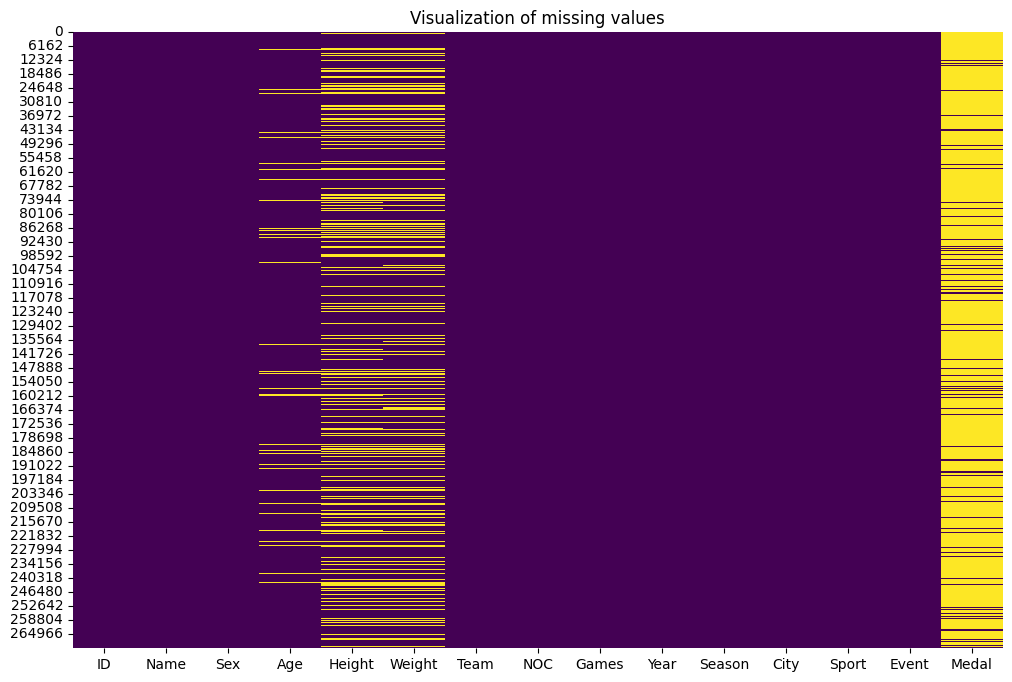

In [4]:
# Rate of missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print(missing_percentage)

# Visualization of missing values by seaborn heatmap 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Visualization of missing values')
plt.show()

## Analysis of Categorical and Numerical Variables
We identify the categorical and numerical columns in the dataset for targeted analysis. For each categorical column, we explore the number of unique values and their most frequent occurrences. Understanding the distribution and frequency of values in categorical variables helps detect potential issues like rare categories or imbalances.

In [5]:
# Categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical Columns: {categorical_cols}")
print(f"Numerical Columns: {numerical_cols}")

# Unique values of categorical variables
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].value_counts().head())

Categorical Columns: Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')
Numerical Columns: Index(['ID', 'Age', 'Height', 'Weight', 'Year'], dtype='object')
Name: 134732 unique values
Name
Robert Tait McKenzie        58
Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Ioannis Theofilakis         36
Takashi Ono                 33
Name: count, dtype: int64
Sex: 2 unique values
Sex
M    196594
F     74522
Name: count, dtype: int64
Team: 1184 unique values
Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: count, dtype: int64
NOC: 230 unique values
NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: count, dtype: int64
Games: 51 unique values
Games
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
Name: count, dtype: int64
Season: 2 unique values
Season
Summe

# Understanding Data with Visualization
In this section, we gain insights by visualizing data with libraries such as Seaborn and Matplotlib. We use several graphics to visualize the data.

## a. Distribution of Categorical Variables
To understand the distribution of sports in the dataset, we use a count plot. This visualization helps identify which sports have the highest representation in the data.

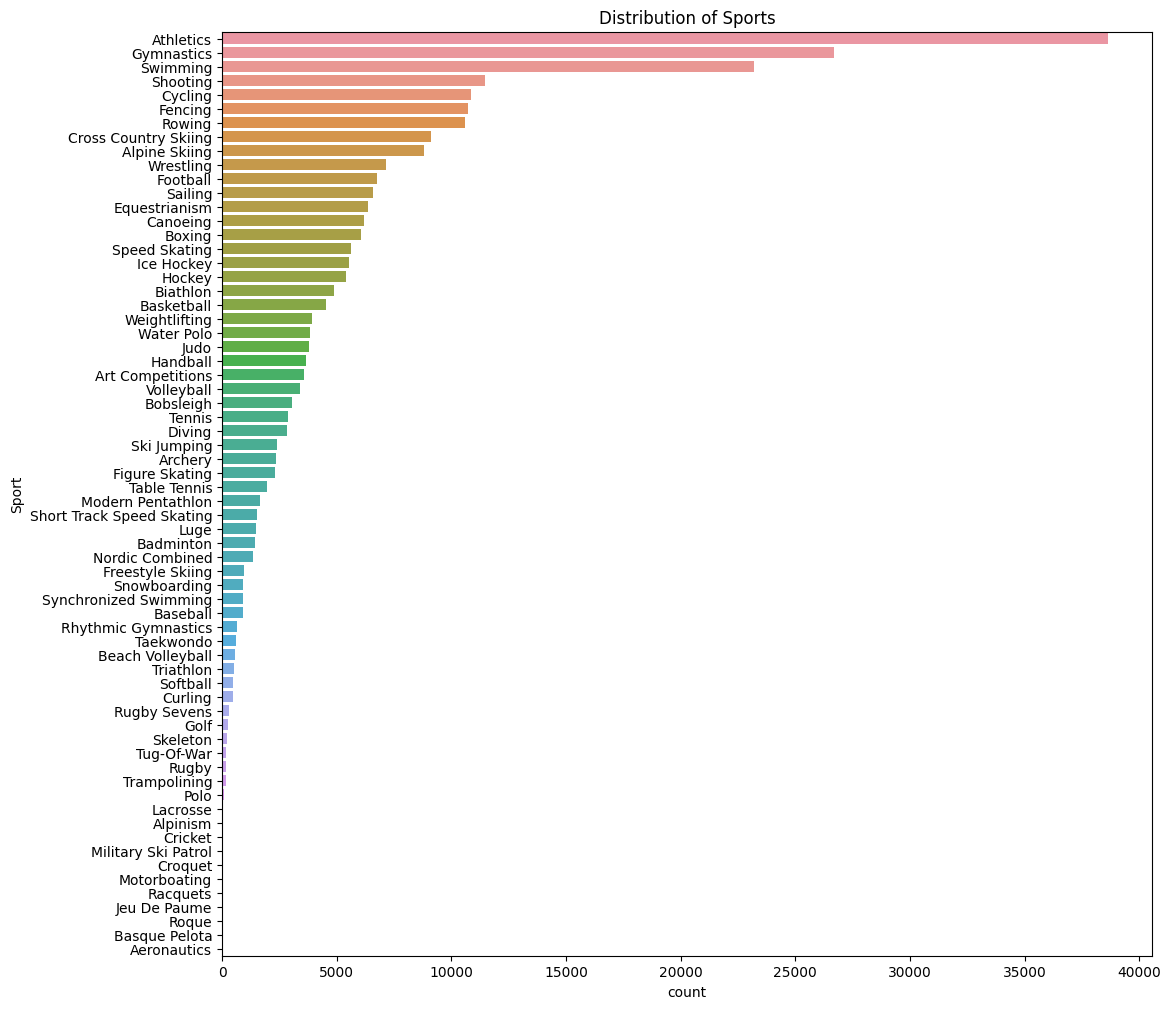

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.countplot(y='Sport', data=data, order=data['Sport'].value_counts().index)
plt.title('Distribution of Sports')
plt.show()

## b. Distribution of Numerical Variables
We analyze the distribution of the Age variable to understand the age range of athletes and identify any patterns or anomalies.
* The histogram shows the age distribution of athletes in the dataset.
* The KDE (Kernel Density Estimation) curve provides a smooth representation of the data distribution.
* Peaks in the distribution indicate the most common age ranges, while gaps or outliers might highlight missing or erroneous data.
* Insights derived from the age distribution can inform further exploration, such as analyzing age-related performance trends.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


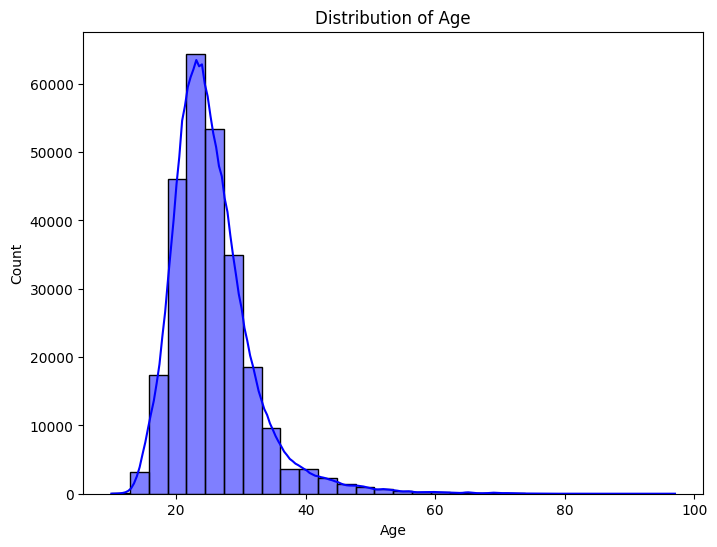

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.show()

## c. Relational Analysis
* The scatter plot illustrates how Weight varies with Age.
* Clusters or trends in the data can highlight common age and weight ranges for athletes.
* Outliers or unusual patterns may indicate data issues or exceptional cases, warranting further investigation.
* This relationship could also help identify age groups and weight categories for specific sports.

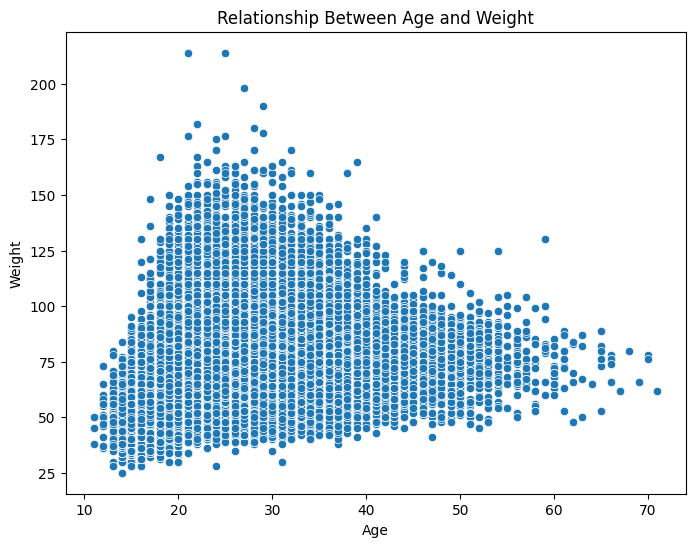

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Weight', data=data)
plt.title('Relationship Between Age and Weight')
plt.show()

## d. Categorical and Numerical Relationship
* The box plot provides insights into the median age, interquartile range (IQR), and potential outliers for each gender.
* Differences in age distribution may reflect gender-specific trends in sports participation or athletic performance.
* Outliers can indicate exceptional cases, such as very young or old athletes in the dataset.
* This analysis is useful for understanding demographic patterns in the dataset.

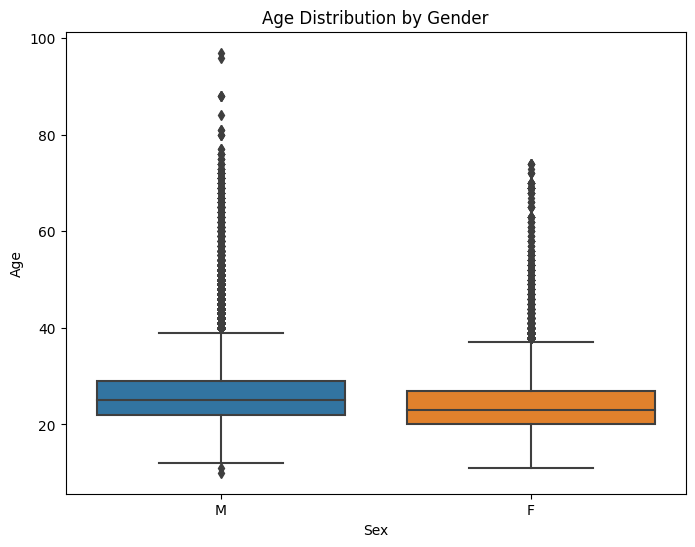

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Age', data=data)
plt.title('Age Distribution by Gender')
plt.show()

* The box plot shows the age distribution for each medal category (Gold, Silver, Bronze, and No Medal).
* Differences in median age and variability between medalists and non-medalists might reveal patterns of peak athletic performance.
* Younger or older athletes among medalists could indicate standout performers in specific sports or events.
* This analysis helps in identifying trends that could influence athlete training and preparation strategies.

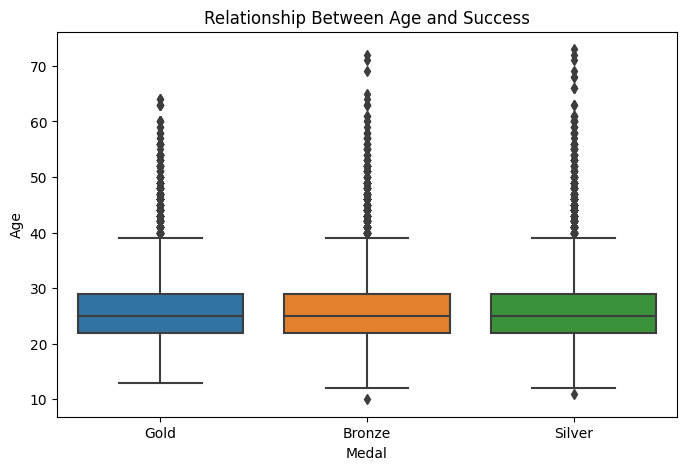

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Medal', y='Age', data=data)
plt.title('Relationship Between Age and Success')
plt.xlabel('Medal')
plt.ylabel('Age')
plt.show()

# Hypothesis
Insights from visualization and analysis:

* Does the chance of winning a medal decrease with age? <br>
* Is there a difference in success between young and mature age groups?

# Data Cleaning and Preprocessing
Missing data can affect the quality of analysis and model performance. Therefore, we identify and visualize the missing values in the dataset.

## 1. Identifying Missing Data
We calculate the total number of missing values and their percentages for each column. Also, a heatmap is used to visualize where missing values exist in the dataset.

Missing value count:
 ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Missing value rate:
 ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.494445
Height    22.193821
Weight    23.191180
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.326207
dtype: float64


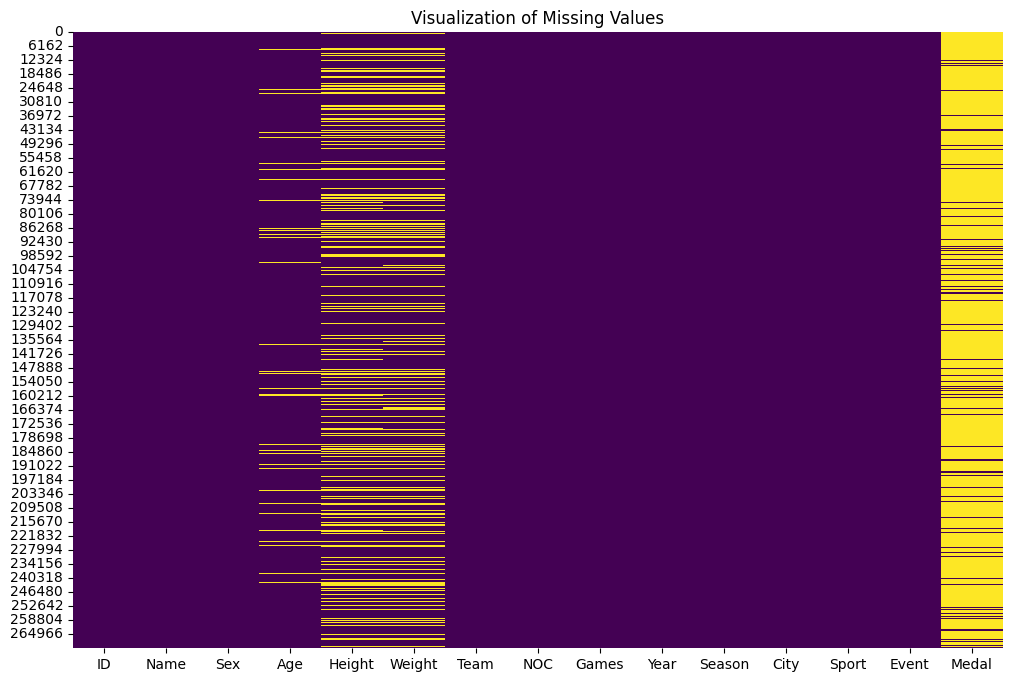

In [11]:
# Calculating missing value and its rate
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

print("Missing value count:\n", missing_values)
print("\nMissing value rate:\n", missing_percentage)

# Visualization of columns which contain missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Visualization of Missing Values")
plt.show()

## 2. Correcting Missing Data (Impute)
To address missing values, we use the following strategies:

* For numerical columns (Height and Weight): Missing values are filled with the mean of each column.
* For categorical columns (Medal): Missing values are replaced with the string "No Medal" to indicate that the athlete did not win a medal.

After imputation, we check for any remaining missing values. This ensures that the dataset is now complete and ready for further analysis.

In [12]:
data['Height'] = data['Height'].fillna(data['Height'].mean())
data['Weight'] = data['Weight'].fillna(data['Weight'].mean())
data['Medal'] = data['Medal'].fillna('No Medal')
data['Age'] = data['Age'].fillna(data['Age'].mean())

print(data.isnull().sum()) # Check that there is no missing data

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


# Statistical Analysis and Visualization
We generate a statistical summary of the dataset using the describe() function. This provides key statistics such as count, mean, standard deviation, and percentiles for numerical columns. For key numerical columns (Age, Height, Weight), we calculate and display the mode, median, and standard deviation to better understand their central tendency and variability.

In [13]:
print("Statistical Summary of Dataset:\n", data.describe())

for col in ['Age', 'Height', 'Weight']:
    print(f"{col} Mode: {data[col].mode()[0]}")
    print(f"{col} Median: {data[col].median()}")
    print(f"{col} Standard Deviation: {data[col].std()}\n")

Statistical Summary of Dataset:
                   ID            Age        Height         Weight  \
count  271116.000000  271116.000000  271116.00000  271116.000000   
mean    68248.954396      25.556898     175.33897      70.702393   
std     39022.286345       6.280857       9.27810      12.574690   
min         1.000000      10.000000     127.00000      25.000000   
25%     34643.000000      22.000000     170.00000      63.000000   
50%     68205.000000      25.000000     175.33897      70.702393   
75%    102097.250000      28.000000     180.00000      75.000000   
max    135571.000000      97.000000     226.00000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  
Age Mode: 23.0
Age Median: 25.0
Age Standard Deviation: 6.280857346147529

Height Mode: 175.33896987366376
Height Median: 175.33896987366376
Height

* The age distribution histogram reveals the age spread of athletes, showing whether there are concentrations in certain age groups.
* The box plots for Height and Weight highlight any extreme values or outliers in these attributes, helping us identify potential anomalies in the dataset.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


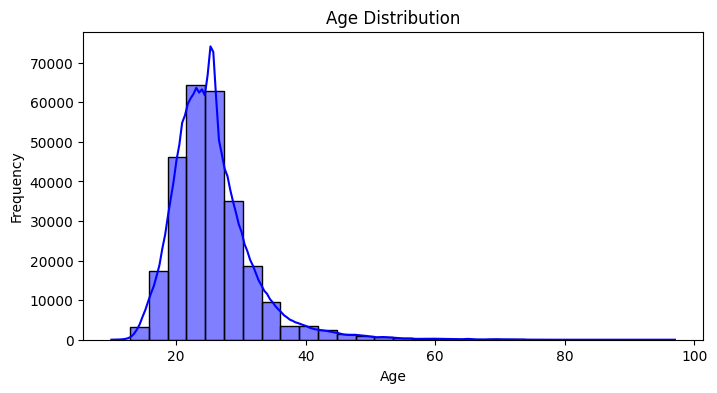

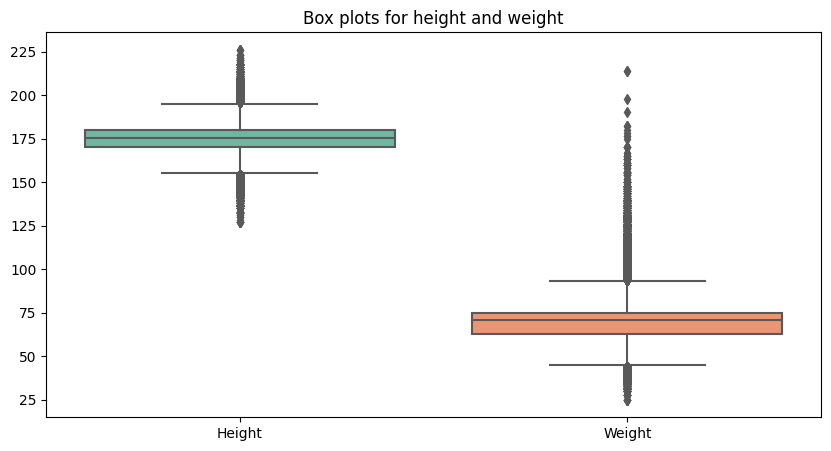

In [14]:
# Age distribution (Histogram)
plt.figure(figsize=(8, 4))
sns.histplot(data['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plots for height and weight
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['Height', 'Weight']], palette='Set2')
plt.title('Box plots for height and weight')
plt.show()

* The correlation matrix shows the correlation coefficients between the selected variables, which range from -1 to 1. A value closer to 1 indicates a strong positive relationship, while a value closer to -1 indicates a strong negative relationship.
* In this case, the heatmap visually represents the correlation matrix, making it easier to identify patterns and relationships between Age, Height, and Weight.

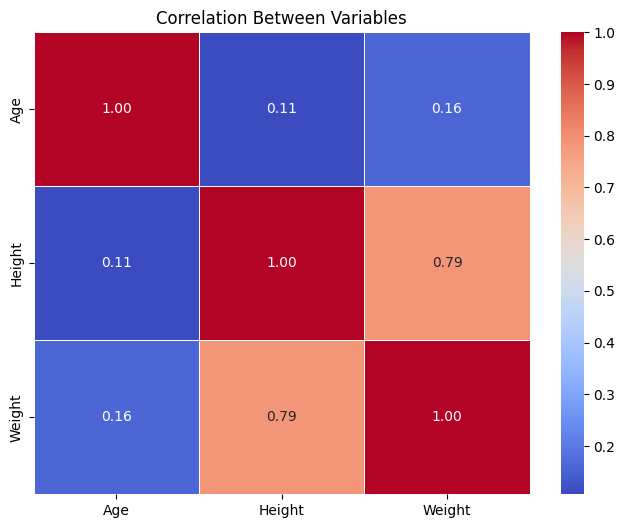

In [15]:
corr_matrix = data[['Age', 'Height', 'Weight']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Variables')
plt.show()

* The scatter plot shows individual data points representing the relationship between Age and Weight. Each point corresponds to an athlete.
* Any visible patterns, such as clusters of points, trends, or outliers, can provide insights into how age might influence weight in this dataset.

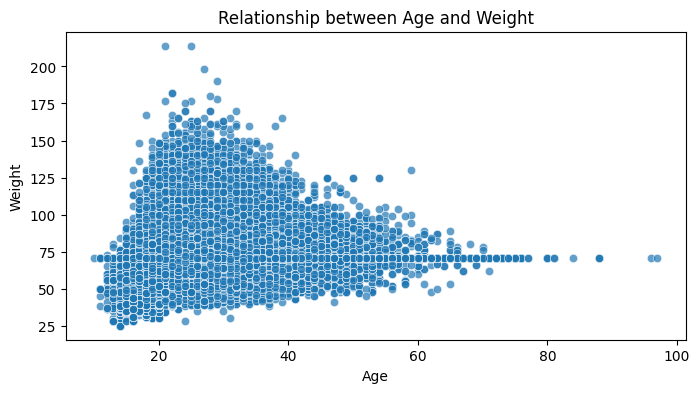

In [16]:
# Relationship between age and weight
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Age', y='Weight', data=data, alpha=0.7)
plt.title('Relationship between Age and Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

* The correlation matrix is filtered to select features that have a correlation greater than 0.3.
* The resulting matrix is printed, showing which features have sufficient correlation to remain in the analysis, helping to reduce potential overfitting in the model.

In [17]:
# Select columns with low correlation
selected_features = corr_matrix[corr_matrix > 0.3].dropna()
print("Selected Features:\n", selected_features)

Selected Features:
 Empty DataFrame
Columns: [Age, Height, Weight]
Index: []


Within the scope of this project, the physical characteristics and success status of Olympic athletes were analyzed. As a result of the analyses performed: <br><br> It was observed that variables such as age, weight, and height were effective on athlete performance.
New features such as BMI were created and more information was obtained from the dataset.
It was predicted that this data could be used to predict the probability of successful athletes and optimize training programs.It is recommended that modeling studies with classification or regression algorithms be conducted in the future.

## Recommendations
Recommendations based on the findings:

- **Data Usage:** Based on the physical characteristics and past achievements of athletes, it can be predicted in which sport they will be more successful.

- **Modeling and Prediction:** This data can be used to predict medals with classification models or to predict performance scores with regression models. For example, a classification model can be established according to the sport branch (e.g., logistic regression, decision trees, or support vector machines).

- **Practical Application:** In line with the obtained predictions:
Coaches can prepare special programs for athletes.
Diet and training strategies can be developed to increase the performance of athletes of the proposed models.

## Proposed ML Algorithms

### For Classification Problems:
- **Support Vector Machines (SVM):** It is an effective model, especially for two-class or multi-class problems.
- **Random Forest:** An algorithm based on decision trees that can learn complex relationships between variables.
### For Regression Problems:
- **Linear Regression:** Simple but effective for understanding the effect of metrics such as height and weight on winning medals.
- **Gradient Boosting (XGBoost, LightGBM):** It successfully learns complex data relationships.
### Reason for Selection:
If the outcome we want to predict is a class, such as whether an athlete will win a medal, classification algorithms can be used.
Regression models are more suitable for predicting a continuous value (e.g. performance score).

## Benefits for the Company
- **Sports Performance Management Companies:**
They can use their resources more efficiently by predicting the probability of athletes being successful. By optimizing their training processes, they can win more medals in the long run.

- **Training and Development Programs:**
Different strategies can be developed for athletes with lower potential. Targeted support can be provided for athletes with higher potential.

## Future Studies and Limitations
Incomplete or incorrect data in the data set can affect the analysis processes. It is important to improve data quality for better results.
Expanding the data set to different regions or sports branches can make it possible to create a more general model.
Hyperparameter optimization and model training with more data can be done to increase the accuracy of the proposed models.